In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df_train = pd.read_csv('/content/train (2).csv')
df_test = pd.read_csv('/content/test (1).csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Много пропусков в колонке "Cabin", лучше ее удалить

In [28]:
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

Заполним пропуски колонки "Age", не изменяя распределения (ну почти)

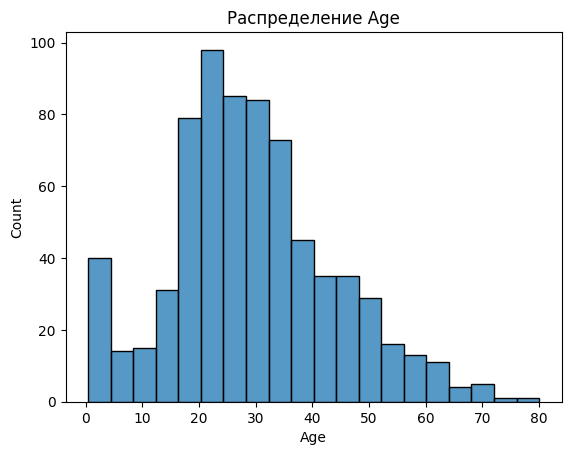

In [29]:
sns.histplot(df_train['Age'], bins = 20)
plt.title('Распределение Age');

In [30]:
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

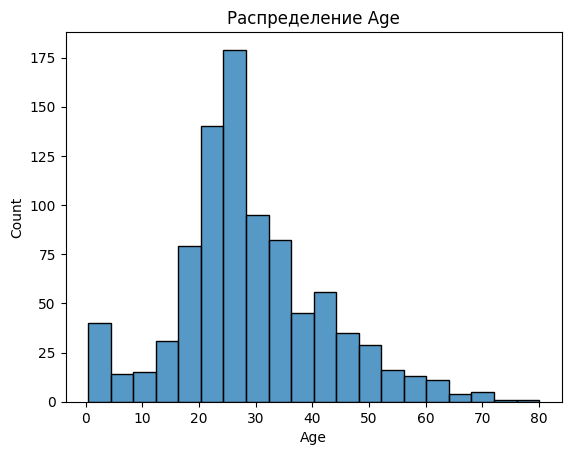

In [31]:
sns.histplot(df_train['Age'], bins = 20)
plt.title('Распределение Age');

Также сделаем из категориального Sex бинарное представление

In [32]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
# закодируем столбец Sex с помощью числовых значений
df_train['Sex'] = df_train['Sex'].map({'male' : 0, 'female' : 1})
df_test['Sex'] = df_test['Sex'].map({'male' : 0, 'female' : 1})

Проверим, что пропуски в 'Age' действительно заполнились, а колонка 'Sex' закодирована верно.

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [36]:
df_train['Sex'].unique()

array([0, 1])

In [37]:
df_test['Sex'].unique()

array([0, 1])

Теперь удалим те колонки, которые точно не дадут полезной информации

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


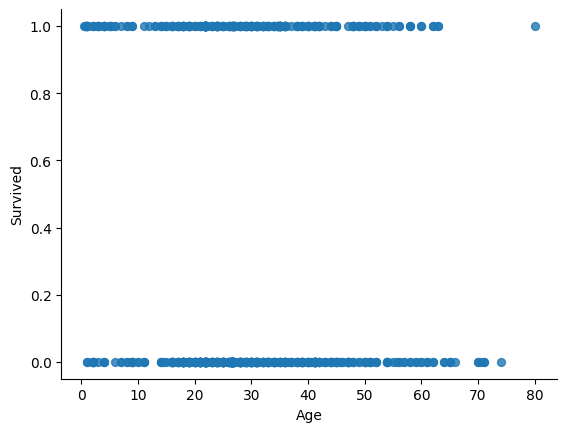

In [39]:
# @title Age vs Survived

from matplotlib import pyplot as plt
df_train.plot(kind='scatter', x='Age', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

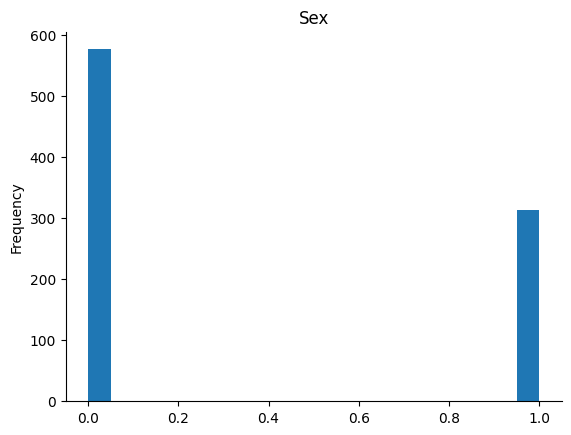

In [40]:
# @title Sex

from matplotlib import pyplot as plt
df_train['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
df_train = df_train[['Sex', 'Age', 'Survived', 'Pclass', 'SibSp', 'Parch']]

Теперь посмотрим двумя способами какие фичи больше влияют на выживаемость:
1 способ - тепловая карта корреляции
2 способ - линейка с l1 регуляризацией

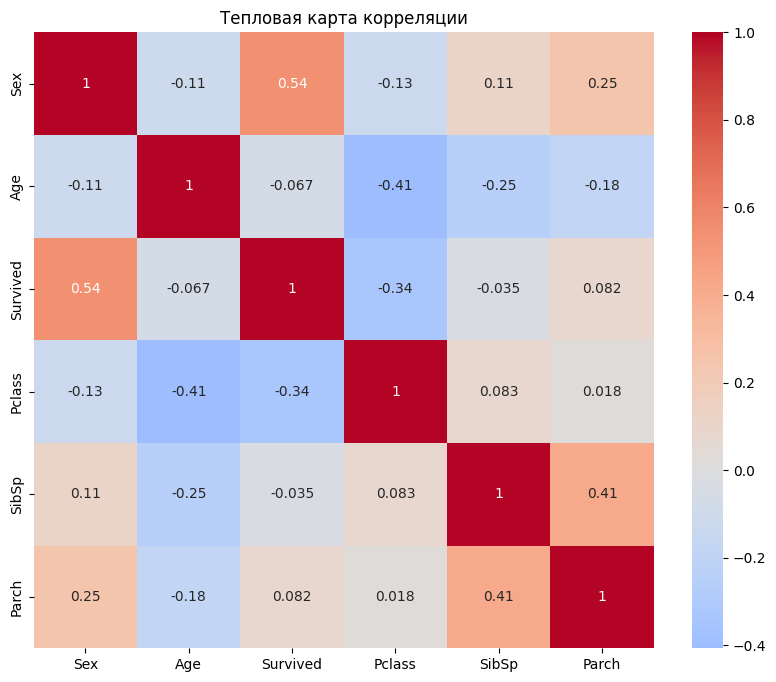

In [42]:
corr_matrix = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляции')
plt.show()

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, make_scorer

X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Определение гиперпараметров для поиска
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 300],
    'C': [0.1, 1.0, 10]
}

# Создание модели логистической регрессии
lin = LogisticRegression()

# Создание GridSearchCV для кросс-валидации
grid_search = GridSearchCV(estimator=lin, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score))

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели с кросс-валидацией
grid_search.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = grid_search.predict(X_test)

# Оценка производительности модели
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'ACC: {acc}')
print(f'F1: {f1}')
print('Коэффициенты L1 или L2: ', grid_search.best_estimator_.coef_)


Лучшие параметры: {'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
ACC: 0.8268156424581006
F1: 0.7801418439716312
Коэффициенты L1 или L2:  [[ 1.2737763  -0.46783815 -0.93674107 -0.34510811 -0.07371801]]


В целом можно не убирать фичи из данного набора и попробовать дерево

In [45]:
from sklearn.ensemble import RandomForestClassifier

X = df_train[features_list]
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8212


In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Выбор признаков и целевой переменной
X = df_train[features_list]
y = df_train['Survived']

# Нормализация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Создание загрузчиков данных
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Определение архитектуры нейронной сети
class TitanicNN(nn.Module):
    def __init__(self):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(5, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Инициализация модели, функции потерь и оптимизатора
model = TitanicNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Оценка модели
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred >= 0.5).float()
    acc = accuracy_score(y_test_tensor, y_pred_class)
    f1 = f1_score(y_test_tensor, y_pred_class)
    print(f'Accuracy: {acc:.2f}')
    print(f'F1 Score: {f1:.2f}')


Epoch [10/100], Loss: 0.7794
Epoch [20/100], Loss: 0.2761
Epoch [30/100], Loss: 0.6109
Epoch [40/100], Loss: 0.5203
Epoch [50/100], Loss: 0.4132
Epoch [60/100], Loss: 0.3643
Epoch [70/100], Loss: 0.4308
Epoch [80/100], Loss: 0.5271
Epoch [90/100], Loss: 0.5873
Epoch [100/100], Loss: 0.2173
Accuracy: 0.82
F1 Score: 0.76


Теперь предскажим результаты на реальной тестовой выборке и отправим на проверку

In [49]:
# Для линейки
X_test = df_test[features_list]
X_test = scaler.transform(X_test)

predictions = lin.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
output.to_csv('submission_linear.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [50]:
# Для случайного леса
X_test = df_test[features_list]

predictions = rf.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
output.to_csv('submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [56]:
# Для NN
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

X_test = scaler.transform(X_test)

# Преобразование данных в тензоры PyTorch
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Создание загрузчиков данных
test_dataset = TensorDataset(X_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

predictions = (model(X_test_tensor) >= 0.5).int().squeeze().numpy()

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
output.to_csv('submission_NN.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
